In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# !pip install pandas_datareader

In [3]:
# !pip install yfinance

In [4]:
import yfinance as yf

In [5]:
#Importing Technology Data - GOOG
GOOG_df = yf.download(tickers='GOOG', period = '5y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [6]:
GOOG_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-05,55.526501,56.375000,55.424000,56.213501,56.213501,21334000
2018-07-06,56.179001,57.046501,56.036850,57.008499,57.008499,19922000
2018-07-09,57.424000,57.733501,57.171001,57.702499,57.702499,18180000
2018-07-10,57.848999,57.979500,57.479500,57.641998,57.641998,15968000
2018-07-11,57.229500,58.214500,57.049999,57.695000,57.695000,22400000


In [7]:
print('No missing data -->GOOG') if sum(GOOG_df.isnull().sum()) == 0 else (GOOG_df.isnull().sum())/len(GOOG_df)

No missing data -->GOOG


In [8]:
GOOG_df.dropna(how='all',inplace = True)

In [9]:
data = GOOG_df[['Close']]
data.head()

,Close
Date,
2018-07-05,56.213501
2018-07-06,57.008499
2018-07-09,57.702499
2018-07-10,57.641998
2018-07-11,57.695000


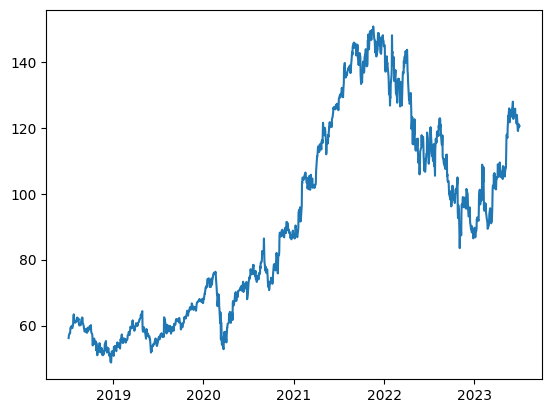

In [10]:
plt.plot(data)

In [11]:
#Normalizing the data :

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [12]:
##splitting dataset into train and test split
training_size=int(len(data)*0.80)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [13]:
training_size,test_size

(1005, 252)

In [14]:
train_data

array([[0.07264618],
       [0.08044808],
       [0.08725881],
       ...,
       [0.6257287 ],
       [0.62263734],
       [0.59433451]])

In [15]:
test_data

array([[0.59147384],
       [0.63863865],
       [0.65165657],
       [0.69181927],
       [0.70028364],
       [0.66450273],
       [0.64808438],
       [0.62195525],
       [0.61462445],
       [0.62764724],
       [0.59960945],
       [0.64583213],
       [0.64661717],
       [0.64995388],
       [0.58439813],
       [0.58292605],
       [0.55574204],
       [0.63582208],
       [0.64553766],
       [0.66565585],
       [0.65427195],
       [0.6583937 ],
       [0.68665723],
       [0.68754051],
       [0.68116157],
       [0.68037645],
       [0.67409566],
       [0.70500895],
       [0.69686353],
       [0.72463642],
       [0.72689353],
       [0.7232625 ],
       [0.70177039],
       [0.70706982],
       [0.68018021],
       [0.65024828],
       [0.64730413],
       [0.64661717],
       [0.67605838],
       [0.61325053],
       [0.60382928],
       [0.59960945],
       [0.59215099],
       [0.60589023],
       [0.58753852],
       [0.57576207],
       [0.60520327],
       [0.594

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(904, 100)
(904,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(151, 100)
(151,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 20s 469ms/step - loss: 0.0674 - val_loss: 0.0197
Epoch 2/100
15/15 [==============================] - 4s 251ms/step - loss: 0.0078 - val_loss: 0.0058
Epoch 3/100
15/15 [==============================] - 3s 204ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 4/100
15/15 [==============================] - 3s 185ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 5/100
15/15 [==============================] - 3s 184ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 6/100
15/15 [==============================] - 4s 266ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 7/100
15/15 [==============================] - 3s 185ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 8/100
15/15 [==============================] - 3s 184ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 9/100
15/15 [==============================] - 3s 187ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 10/100
15/15 [==============================] - 4s 266ms/step - loss: 0.0019 - val_l

In [25]:
import tensorflow as tf

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 41ms/step


In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

95.49954150101584

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

103.58537508245296

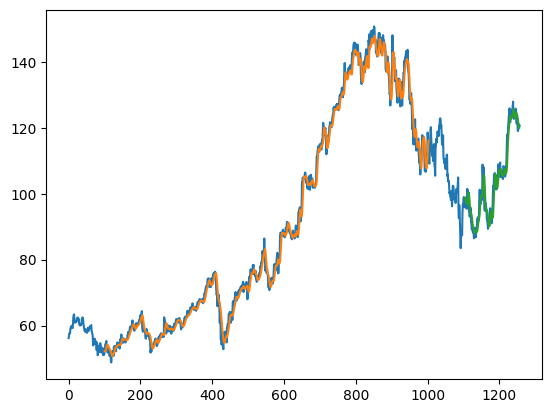

In [30]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
# len(test_data)

In [32]:
# x_input=test_data[152:].reshape(1,-1)
# x_input.shape

In [33]:
# temp_input=list(x_input)
# temp_input=temp_input[0].tolist()

In [34]:
# temp_input

In [35]:
# # demonstrate prediction for next 10 days
# from numpy import array

# lst_output=[]
# n_steps=100
# i=0
# while(i<30):

#     if(len(temp_input)>100):
#         #print(temp_input)
#         x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
#         x_input=x_input.reshape(1,-1)
#         x_input = x_input.reshape((1, n_steps, 1))
#         #print(x_input)
#         yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
#         temp_input.extend(yhat[0].tolist())
#         temp_input=temp_input[1:]
#         #print(temp_input)
#         lst_output.extend(yhat.tolist())
#         i=i+1
#     else:
#         x_input = x_input.reshape((1, n_steps,1))
#         yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
#         temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
#         lst_output.extend(yhat.tolist())
#         i=i+1

# print(lst_output)